In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings

In [10]:
warnings.filterwarnings('ignore')

In [11]:
df_p = pd.read_csv('Data/fig3.Brains_irQTL_vs_eQTL.xls',sep='\t')

In [12]:
df_p.sort_values('tissue',inplace=True)

In [13]:
df_sig = df_p[(df_p['XAEM_P']<5e-8) & (df_p['GTEX_pval_nominal']>0.05)]
df_sig['GTEX_pval_nominal'] = -np.log10(df_sig['GTEX_pval_nominal'])
df_sig['XAEM_P'] = -np.log10(df_sig['XAEM_P'])

In [14]:
df_nonsig = df_p[(df_p['XAEM_P']>=5e-8) | (df_p['GTEX_pval_nominal']<=0.05)]
df_nonsig['GTEX_pval_nominal'] = -np.log10(df_nonsig['GTEX_pval_nominal'])
df_nonsig['XAEM_P'] = -np.log10(df_nonsig['XAEM_P'])

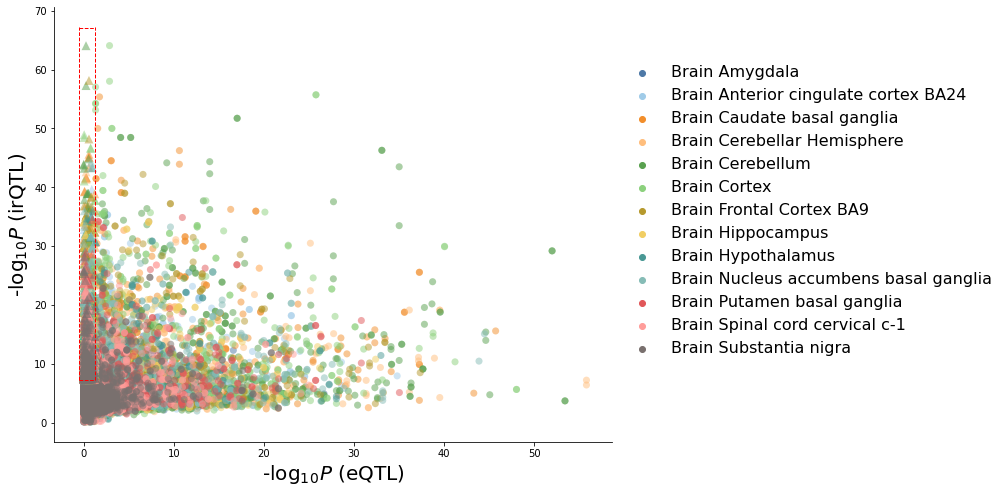

In [16]:
colors = ["#4E79A7","#A0CBE8","#F28E2B","#FFBE7D","#59A14F","#8CD17D","#B6992D","#F1CE63","#499894","#86BCB6","#E15759","#FF9D9A","#79706E"]
fig,ax = plt.subplots(figsize=(10,8))

g = sns.scatterplot(data=df_nonsig,
                x="GTEX_pval_nominal", y="XAEM_P", hue="tissue",alpha=0.5,s=50,legend=False,linewidth = 0,
                palette=colors
               )
g = sns.scatterplot(data=df_sig,
                x="GTEX_pval_nominal", y="XAEM_P", hue="tissue",alpha=0.5,s=80,marker='^',linewidth = 0,
                palette=colors
               )


g.set_xlabel('-log${_1}{_0}P$ (eQTL)',fontsize=20)
g.set_ylabel('-log${_1}{_0}P$ (irQTL)',fontsize=20)

y = np.arange(-np.log10(5e-8),68,1)
x = np.repeat(-np.log10(0.05),len(y))
plt.plot(x,y,color="red",linewidth=1,ls='--')

y = np.arange(-np.log10(5e-8),68,1)
x = np.repeat(-0.5,len(y))
plt.plot(x,y,color="red",linewidth=1,ls='--')


x = np.arange(-0.5,-np.log10(0.05),0.1)
y = np.repeat(-np.log10(5e-8),len(x))
plt.plot(x,y,color="red",linewidth=1,ls='--')

x = np.arange(-0.5,-np.log10(0.05),0.1)
y = np.repeat(67,len(x))
plt.plot(x,y,color="red",linewidth=1,ls='--')

handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles, labels=[i.replace('_',' ') for i in labels],
         bbox_to_anchor=(1.0, 0.9),
         frameon=False,fontsize=16)
sns.despine()
plt.savefig('figures/fig3.scatter_irqtl_vs_eqtl.pdf',bbox_inches='tight')